In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


%matplotlib inline

In [2]:
credit=pd.read_excel('CreditTaiwan.xlsx')
credit.head()

id  credit  sex  education  marriage  age  Sep05  Aug 05  Jul 05  Jun 05  \
0   1   20000    2          2         1   24      2       2      -1      -1   
1   2  120000    2          2         2   26     -1       2       0       0   
2   3   90000    2          2         2   34      0       0       0       0   
3   4   50000    2          2         1   37      0       0       0       0   
4   5   50000    1          2         1   57     -1       0      -1       0   

            ...             stat.amnt(jun)  stat.amnt(may)  stat.amnt(apr)  \
0           ...                          0               0               0   
1           ...                       3272            3455            3261   
2           ...                      14331           14948           15549   
3           ...                      28314           28959           29547   
4           ...                      20940           19146           19131   

   paid(sept)  paid(aug)  paid(jul)  paid(jun)  paid(may)  paid(april)  \
0           0        689          0          0          0            0   
1           0       1000       1000       1000          0         2000   
2        1518       1500       1000       1000       1000         5000   
3        2000       2019       1200       1100       1069         1000   
4        2000      36681      10000       9000        689          679   

   defaultpaymentnextmonth  
0                        1  
1                        1  
2                        0  
3                        0  
4                        0  

[5 rows x 25 columns]

In [3]:
notdefaulted=credit.loc[(credit.defaultpaymentnextmonth)==0]
defaulted=credit.loc[(credit.defaultpaymentnextmonth)==1]

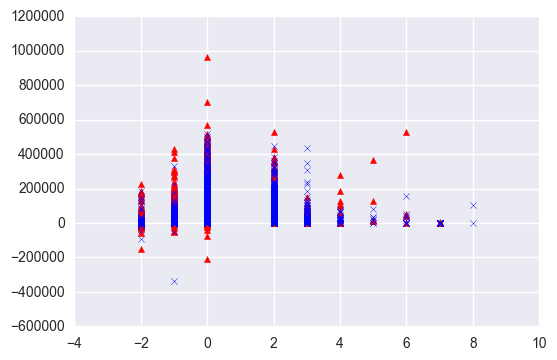

In [4]:
d=plt.scatter(notdefaulted['Apr 05'], notdefaulted['stat.amnt(apr)'], color='r', marker='^')
nd=plt.scatter(defaulted['Apr 05'], defaulted['stat.amnt(apr)'], color='b', marker='x')

# ML - KNN

In [5]:
creditdata=credit.ix[:,0:-1]
credittarget=credit.ix[:,-1]


In [6]:
# split into test and training

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(creditdata, credittarget, train_size=0.8)


In [8]:
# knn 

from sklearn.neighbors import KNeighborsClassifier

N=KNeighborsClassifier(n_neighbors=5)
N.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
Y_output=N.predict(X_test)
Results=pd.DataFrame(y_test)
Results['Output']=Y_output.tolist()
Accuracy=((Results['Output']==Results['defaultpaymentnextmonth']).sum())/Results['Output'].count()
Accuracy